In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
diabetes=pd.read_csv('Data/diabetes.csv')
print(diabetes.columns)

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### The diabetes dataset consists of 768 data points, with 9 features each

In [5]:
print("dimension of diabetes data: {}". format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Outcome 0 means No diabetes, outcome 1 means diabetes

In [6]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


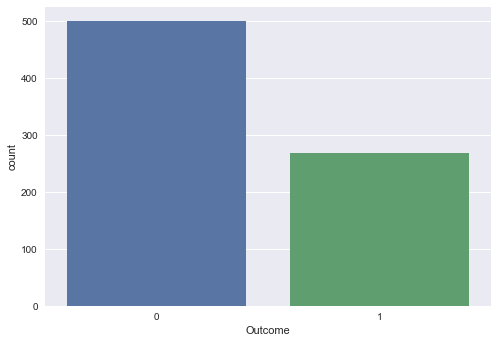

In [7]:
import seaborn as sns
sns.countplot(diabetes['Outcome'], label="Count")

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### k_Nearest Neighbors
The k_NN algorith is arguably the simplest machine learning algorithm. Building the model consisits only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the cloest data point in the training dataset-its "nearest neighbors."

### Let's investigate whether we can confirm the connection between model complexity and accuracy

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(diabetes.loc[:, diabetes.columns!='Outcome'],
                                                 diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

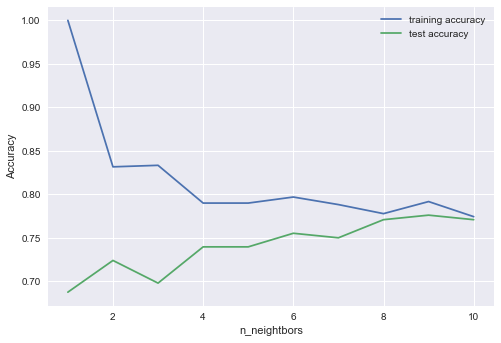

In [14]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy=[]
test_accuracy=[]

#try n_neighbors from 1 to 10
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    #record the training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    #record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neightbors")
plt.legend()
plt.savefig('knn_compare_model')

The plot shows the training and test set accuracy on the y_axis against the setting of n_neighbors on the x_axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 9 neighbors.

The above plot suggests that we should choose n_neighbors=9. Here we are:

In [17]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of k_NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of k_NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of k_NN classifier on training set: 0.79
Accuracy of k_NN classifier on test set: 0.78


### Logistic Regression
Logistic regression is one of the most common classification algorithms.

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression().fit(X_train, y_train)
print("Training set accuracy: {:.3f}". format(logreg.score(X_train, y_train)))
print("Test set accuracy: {:.3f}". format(logreg.score(X_test, y_test)))

Training set accuracy: 0.781
Test set accuracy: 0.771


/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The default value of C=1 provides with 78% accuracy on trainign and 77% accuracy on test set.

In [19]:
logreg001=LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}". format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}". format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.700
Test set accuracy: 0.703


Using C=0.01 results in lower accuracy on both the training and test scores.

In [20]:
logreg100=LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}". format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}". format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.785
Test set accuracy: 0.766


Using C=100 results in a little bot higher accuracy on the training set and little bit lower accuracy on test set, confirming that less regularization and a more complex model may not generalize better than default setting.

Therefore, we should choose default value C=1.

Finally, let's look at the coefficients learned by the model with the three different settings of the regularization parameters C.

Stronger regularization (C=0.001) pushes coefficients more and more toward zero. Inspecting the plot more closely, we can see that feature "DiabetesPredigreeFunction", for C=100, C=1, and C=0.001, the coefficient is positive. This indicates that high "DiabetesPedigreeFunction" feature is related to a sample being "diabetes"m regardless which model we look at.

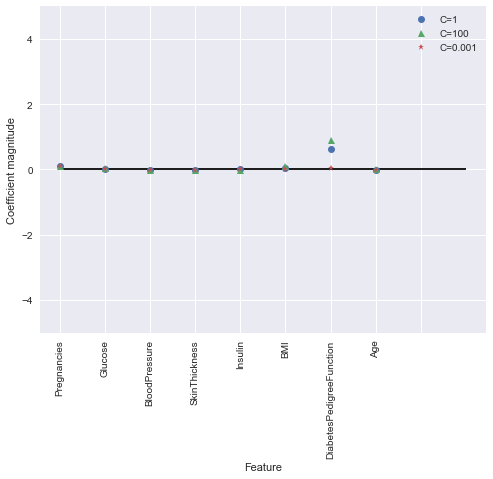

In [24]:
diabetes_features=[x for i, x in enumerate(diabetes.columns) if i!=8]

plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, '*', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}". format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}". format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [26]:
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}". format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}". format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


### Feature importance in Decision trees
Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means "not used at all" and 1 means "prefectly predicts the target". The feature importances always sum to 1:

In [27]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


We can visualize the feature importances.

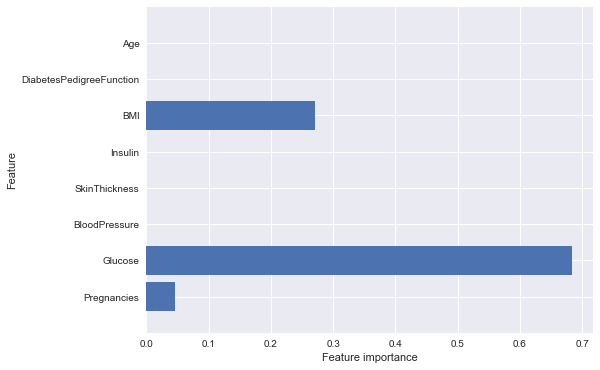

In [30]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features=8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

Feature "Glucose" is by far the most important feature.

### Random Forest

let's apply a random forest consisting of 100 trees on th diabetes dataset:

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


The random forest gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved.

In [35]:
rf1=RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


It did not, this indicates that the default parameters of the random forest work well.

### Feature importnace in Random Forest

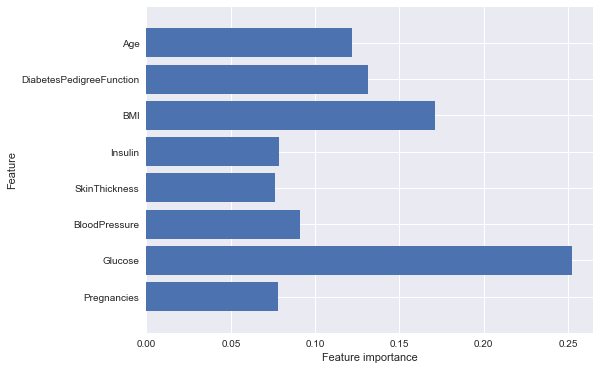

In [37]:
plot_feature_importances_diabetes(rf)

Similarly to the single decision tree, the random forest als ogives a lot of importance to the "Glucose" feature, but it also choose "BMI" to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

### Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gb=GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on test set: 0.792


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [40]:
gb1=GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gb1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(X_test, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.781


In [41]:
gb2=GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test)))

Accuracy on training set: 0.802
Accuracy on test set: 0.776


Both methods of decreasing the model complexity reduced the traning set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

We can visualize the feature importnaces to get more insight into our model even though we are not really happy with the model.

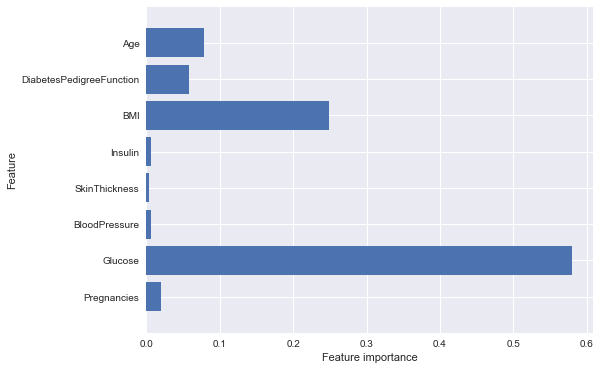

In [43]:
plot_feature_importances_diabetes(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importnaces of the random forests, it gives weight to all of the features in this case.

### Support Vector Machine

In [44]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.651


/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The model overfits quite substantially, with a perfet score on the tranining set and only 65% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale.

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

svc=SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


Scaling the data made a huge difference. Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [50]:
svc=SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.790
Accuracy on test set: 0.797


Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.

### Neural Networks

In [51]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.73
Accuracy on test set: 0.72


The accuracy of the MLP is not as good as the other model at all, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a varaince of 1. We must rescale our data so that it fulfills these requirements.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling. As at matter of fact, we have obtained the highest test accuracy so far.

In [55]:
mlp=MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.792


/Users/jingchen/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
mlp=MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.797


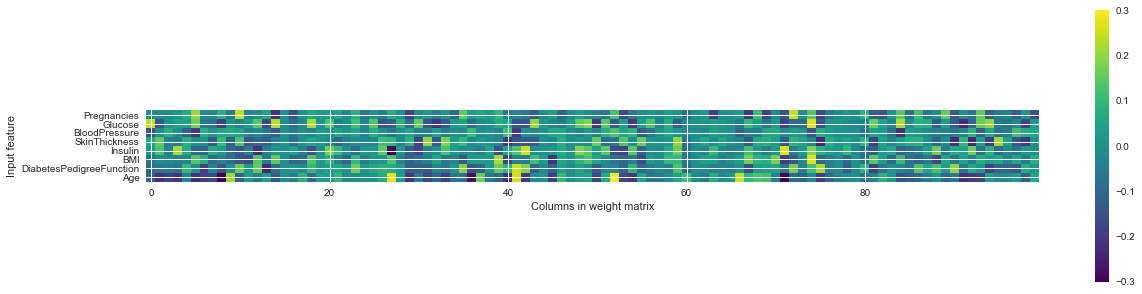

In [57]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

From the heat map, it is not easy to point out quickly that whihc feature (features) have relatively low weights compared to the other features.

### Summary
We practiced a wide array of machine learning models for classification and regression, what their advantages and disadvantages are, and how to control model complexity for each of them. We saw that for many of the algorithms, setting the right paramters is important for good performance. 

We should be able to know how to apply, tune, and analzye the models we practiced above.